Загрузить датасет, подготовить датасет, выполнить исследование и отбор признаков. Обучить алгоритм Decision tree. Выполнить прогноз на проверочных данных. Снять метрики и ошибки модели. Написать выводы.
Датасет: 13_credit_approve.rar
Датасет содержит данные об одобрении или отказе в выдаче кредита клиентам.
целевая переменная А16 - “+\-”

In [119]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [120]:
ds = pd.read_csv('crx.data', header=None)
ds.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [121]:
ds.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

In [122]:
# Print DataFrame information
ds.info()

print('\n')

# Inspect missing values in the dataset
ds.tail(17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB




,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


In [123]:
# Print summary statistics
ds.describe()

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [124]:
# Replace the '?'s with NaN
ds = ds.replace('?', np.nan)

In [125]:
ds.tail(17)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
673,NaN,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


In [126]:
# Impute the missing values with mean imputation
ds.fillna(ds.mean(), inplace=True)

# Count the number of NaNs in the dataset to verify
ds.isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_9032\3962556285.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ds.fillna(ds.mean(), inplace=True)


0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64

In [127]:
# Iterate over each column of cc_apps
for col in ds.columns:
    # Check if the column is of object type
    if ds[col].dtypes == 'object':
        # Impute with the most frequent value
        ds = ds.fillna(ds[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
print(ds.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64


In [128]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder() 

# Iterate over all the values of each column and extract their dtypes
for col in ds.columns.to_numpy():
    # Compare if the dtype is object
    if ds[col].dtypes == 'object':
    # Use LabelEncoder to do the numeric transformation
        ds[col]=le.fit_transform(ds[col])

In [129]:
ds.dtypes

0       int32
1       int32
2     float64
3       int32
4       int32
5       int32
6       int32
7     float64
8       int32
9       int32
10      int64
11      int32
12      int32
13      int32
14      int64
15      int32
dtype: object

In [142]:
# Drop the features 11 and 13 and convert the DataFrame to a NumPy array
ds = ds.drop([11, 13], axis=1)
ds = ds.to_numpy()

# Segregate features and labels into separate variables
X, y = ds[:,0:13], ds[:,13]


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.30,
                                random_state=42)

In [143]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.30,
                                random_state=42)

In [145]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [146]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((483, 13), (207, 13), (483,), (207,))

In [147]:
# обучить классификатор DecisionTreeClassifier 
# вызываем конструктор дерева решений DecisionTreeClassifier 

base_dec_tree = DecisionTreeClassifier()

In [148]:
# метод .fit используется для обучения оценщиков(классификаторов или регрессоров)
# .fit(вектор признаков, вектор целей)

base_dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [149]:
# оценим качество полученного дерева на тестовой выборке метрикой accuracy_score
# accuracy_score(<вектор меток>, <вектор предсказаний>)
# для прогоноза вызываем .predict(<Вектор с признаками>)

score = accuracy_score(y_test, base_dec_tree.predict(X_test))
print('Accuracy:', score)

Accuracy: 0.8743961352657005


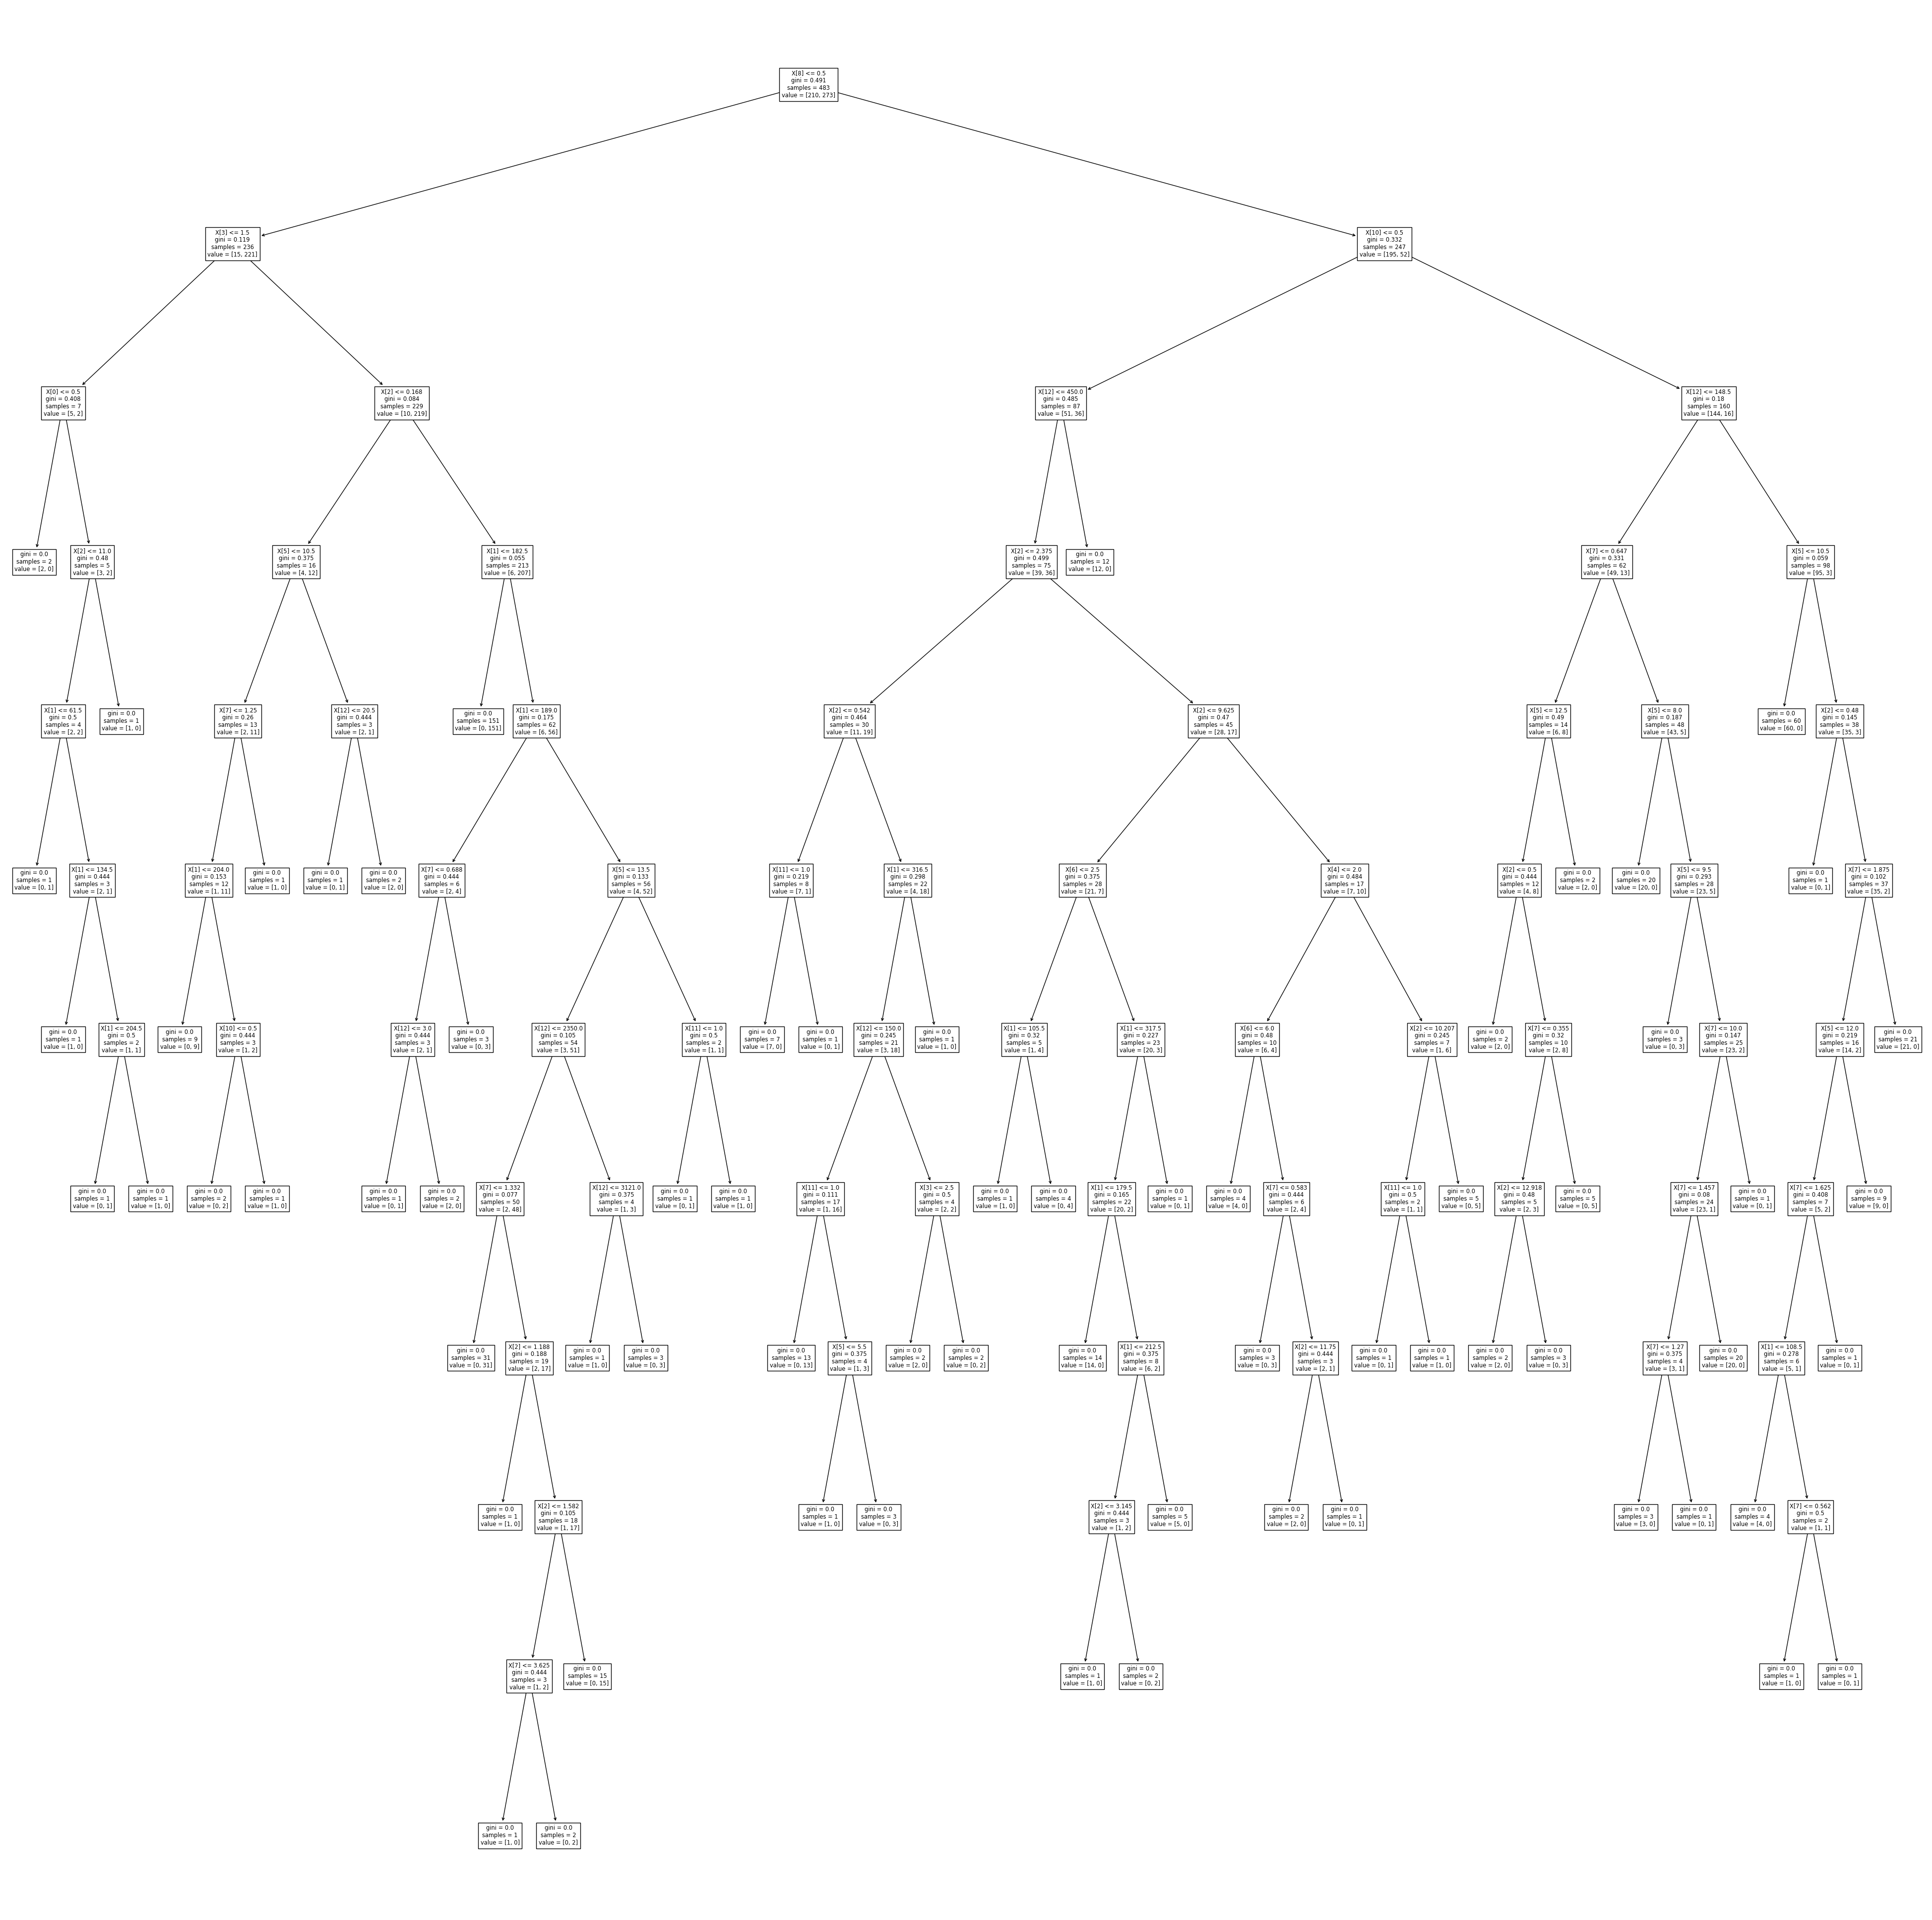

In [168]:
# построим дерево с помощью функции plot_tree из файла tree
# tree.plot_tree(<объект дерева>, <название признаков>, <Навзание классов>)

import matplotlib.pyplot as plt
plt.figure(figsize=(50, 50))
tree.plot_tree(base_dec_tree);